In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
esg_data = pd.read_csv('company_esg_financial_dataset.csv')

print(f"Original shape: {esg_data.shape}")
columns_to_drop = [
    'CompanyID', 
    'CompanyName', 
    'Revenue', 
    'ProfitMargin', 
    'MarketCap', 
    'GrowthRate',
    'ESG_Social', 
    'ESG_Governance'
]

esg_data = esg_data.drop(columns=columns_to_drop)
print(esg_data.isnull().sum())

esg_data = esg_data.dropna()
print(esg_data.dtypes)
print(f"New shape: {esg_data.shape}")

Original shape: (11000, 16)
Industry             0
Region               0
Year                 0
ESG_Overall          0
ESG_Environmental    0
CarbonEmissions      0
WaterUsage           0
EnergyConsumption    0
dtype: int64
Industry              object
Region                object
Year                   int64
ESG_Overall          float64
ESG_Environmental    float64
CarbonEmissions      float64
WaterUsage           float64
EnergyConsumption    float64
dtype: object
New shape: (11000, 8)


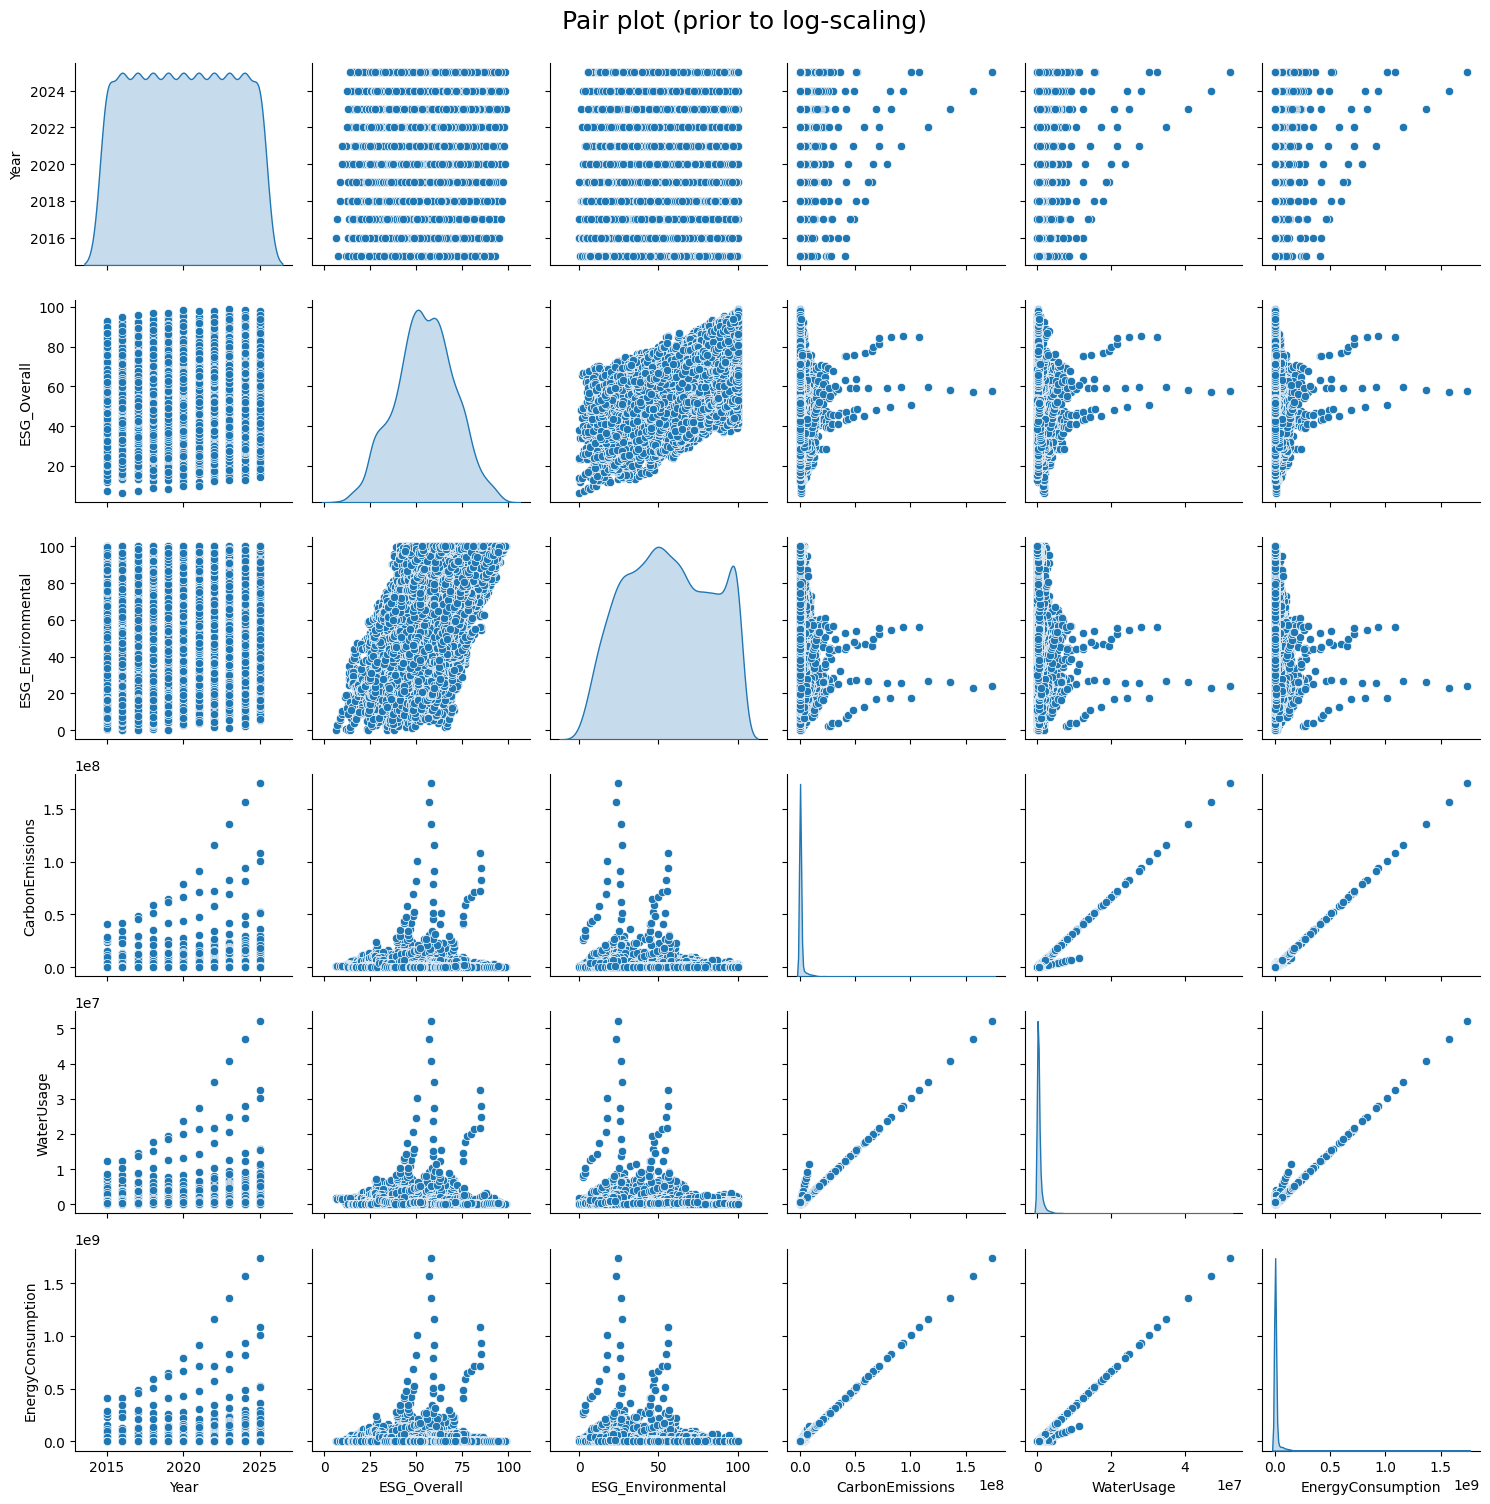

In [26]:
sns.pairplot(esg_data, diag_kind='kde')
plt.gcf().suptitle("Pair plot (prior to log-scaling)", fontsize=18, y=1)
plt.tight_layout()
plt.show()

In [27]:
import numpy as np

esg_tech = esg_data[esg_data['Industry'] == 'Technology'].copy()

columns_to_transform = ['CarbonEmissions', 'WaterUsage', 'EnergyConsumption']

transformed_columns = []

for col in columns_to_transform:
    original_skew = esg_tech[col].skew()
    print(f"Original skew for {col}: {original_skew:.3f}") #metric to see the bad skew, further from 1 means the more skewed
    
    esg_tech[col] = np.log1p(esg_tech[col]) #log tansformation
    new_skew = esg_tech[col].skew()
    
    if abs(new_skew) < abs(original_skew):
        transformed_columns.append(col)
    else:
        esg_tech[col] = esg_data[esg_data['Industry'] == 'Technology'][col]


all_numeric_cols = ['CarbonEmissions', 'WaterUsage', 'EnergyConsumption', 
                    'ESG_Overall', 'ESG_Environmental']
print("\nFinal skewness after transformation for all columns:")
for col in all_numeric_cols:
    print(f"{col}: {esg_tech[col].skew():.3f}")

Original skew for CarbonEmissions: 3.170
Original skew for WaterUsage: 3.170
Original skew for EnergyConsumption: 3.170

Final skewness after transformation for all columns:
CarbonEmissions: 0.178
WaterUsage: 0.178
EnergyConsumption: 0.178
ESG_Overall: -0.161
ESG_Environmental: -1.669


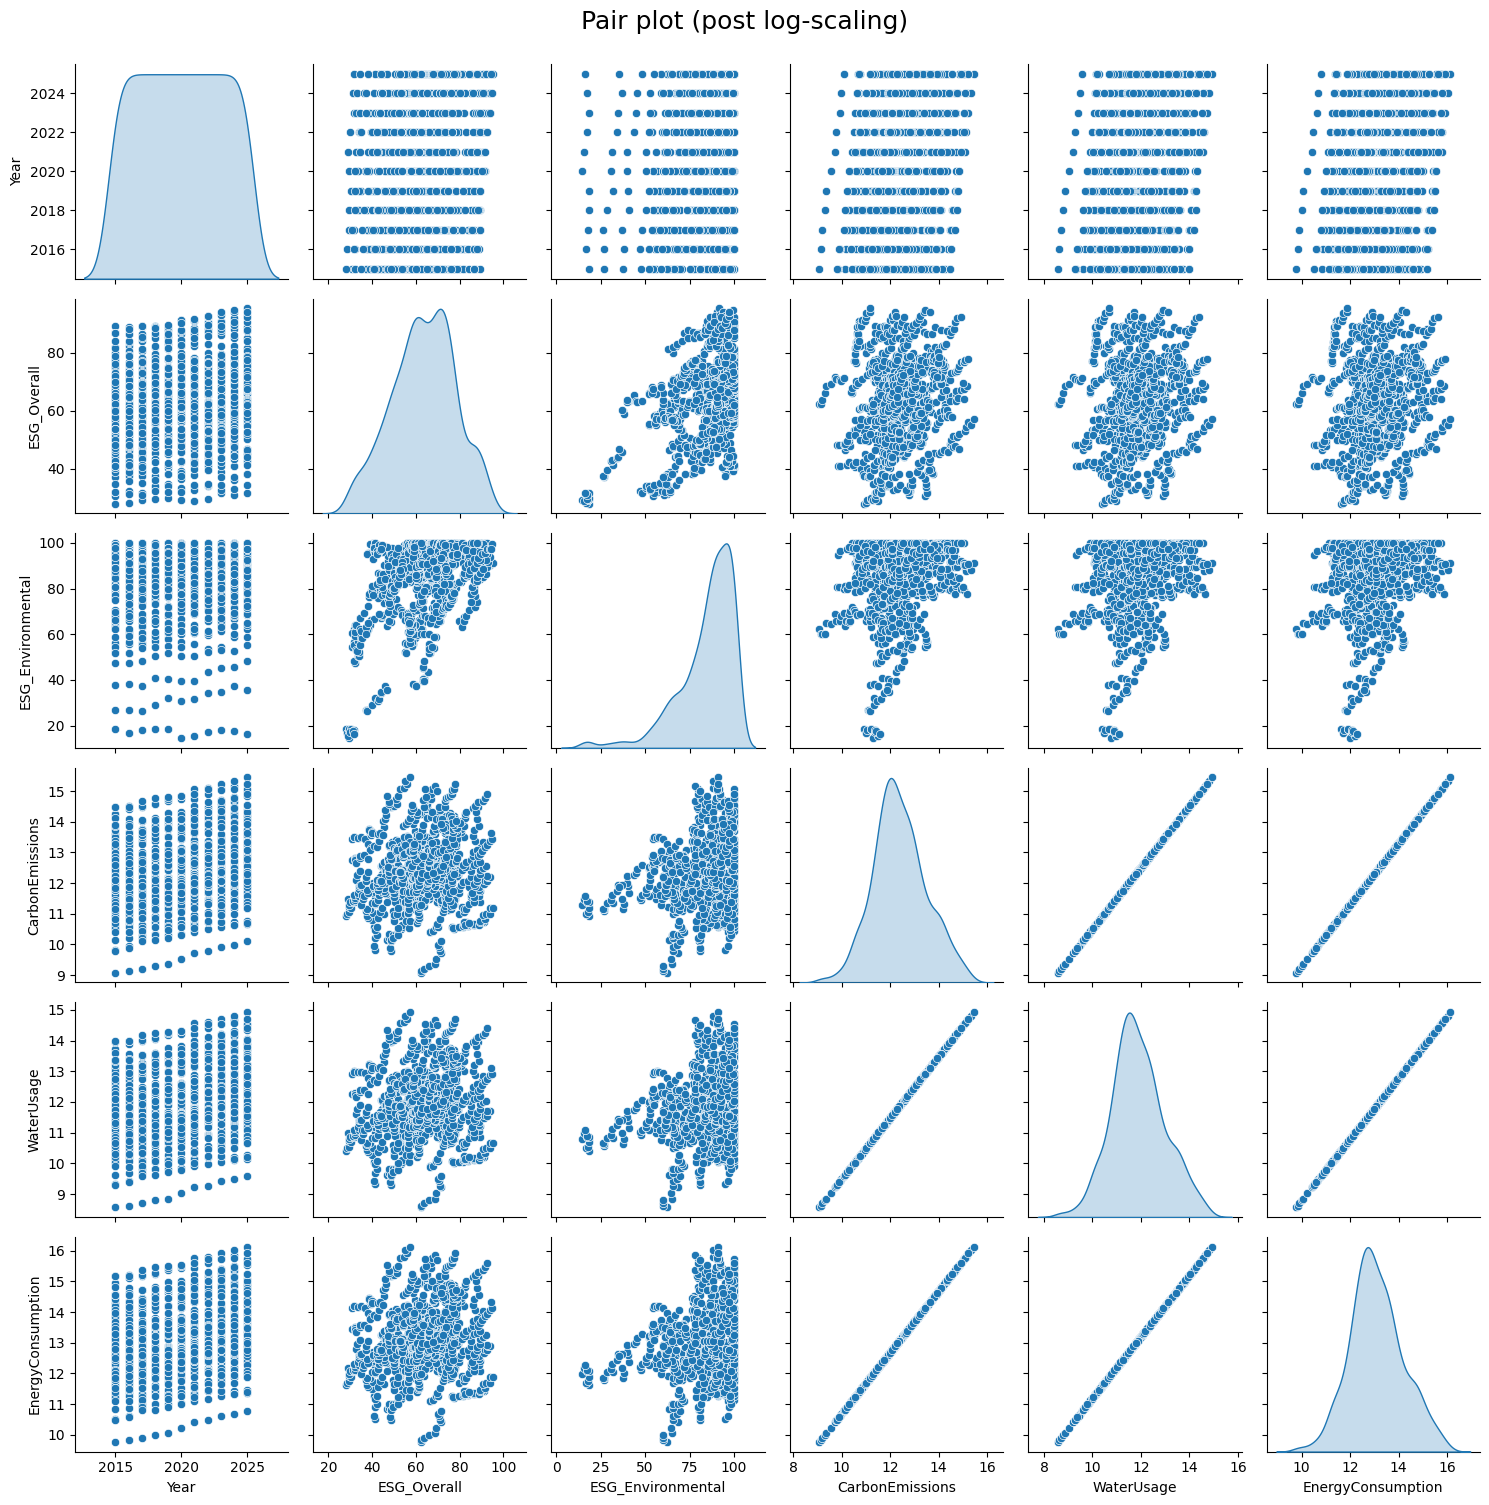

In [28]:
sns.pairplot(esg_tech, diag_kind='kde')
plt.gcf().suptitle("Pair plot (post log-scaling)", fontsize=18, y=1)
plt.tight_layout()
plt.show()

In [25]:
# Step 4: Aggregate ESG Tech data by Region
esg_by_region = esg_tech.groupby('Region').agg({
    'ESG_Overall': 'mean',
    'ESG_Environmental': 'mean',
    'CarbonEmissions': 'mean',
    'WaterUsage': 'mean',
    'EnergyConsumption': 'mean'
}).reset_index()

print("=" * 60)
print("ESG DATA AGGREGATED BY REGION")
print("=" * 60)
print(f"Shape: {esg_by_region.shape}")
print(f"Number of regions: {esg_by_region['Region'].nunique()}")
print("\nFirst few rows:")
print(esg_by_region.head())
print("\nRegions in ESG data:")
print(sorted(esg_by_region['Region'].unique()))

ESG DATA AGGREGATED BY REGION
Shape: (7, 6)
Number of regions: 7

First few rows:
          Region  ESG_Overall  ESG_Environmental  CarbonEmissions  WaterUsage  \
0         Africa    50.961039          85.455195        12.253572   11.742751   
1           Asia    53.063636          77.575974        12.369275   11.858454   
2         Europe    77.914286          88.594156        12.661230   12.150407   
3  Latin America    58.989256          86.411570        12.525688   12.014869   
4    Middle East    58.346753          87.616234        12.455495   11.944673   

   EnergyConsumption  
0          12.946715  
1          13.062419  
2          13.354375  
3          13.218831  
4          13.148639  

Regions in ESG data:
['Africa', 'Asia', 'Europe', 'Latin America', 'Middle East', 'North America', 'Oceania']


In [29]:
# Check your data_centers dataframe structure
data_centers = pd.read_csv('data_centers_fully_cleaned.csv')
print("\n" + "=" * 60)
print("DATA CENTERS DATAFRAME CHECK")
print("=" * 60)
print(f"Shape: {data_centers.shape}")
print(f"Number of unique regions: {data_centers['region'].nunique()}")
print(f"Total rows: {len(data_centers)}")

# Check if there are duplicates per region
print("\nRows per region:")
print(data_centers['region'].value_counts().head(10))

print("\nRegions in data_centers:")
print(sorted(data_centers['region'].unique()))


DATA CENTERS DATAFRAME CHECK
Shape: (191, 16)
Number of unique regions: 7
Total rows: 191

Rows per region:
region
Africa           51
Europe           45
Latin America    32
Asia             31
Middle East      16
Oceania          13
North America     3
Name: count, dtype: int64

Regions in data_centers:
['Africa', 'Asia', 'Europe', 'Latin America', 'Middle East', 'North America', 'Oceania']


In [31]:

# Check for outliers in key columns BEFORE aggregation
outlier_cols = ['total_data_centers', 'hyperscale_data_centers', 
                'power_capacity_MW_total', 'floor_space_sqft_total']

print("=" * 60)
print("OUTLIER ANALYSIS - Before Aggregation")
print("=" * 60)

for col in outlier_cols:
    print(f"\n{col}:")
    print(f"  Mean: {data_centers[col].mean():.2f}")
    print(f"  Median: {data_centers[col].median():.2f}")
    print(f"  Max: {data_centers[col].max():.2f}")
    print(f"  95th percentile: {data_centers[col].quantile(0.95):.2f}")
    
    # Show top 5 values
    print(f"  Top 5 values: {sorted(data_centers[col].dropna(), reverse=True)[:5]}")

# Check by region
print("\n" + "=" * 60)
print("Distribution by Region:")
print("=" * 60)
print(data_centers.groupby('region')['total_data_centers'].describe())

OUTLIER ANALYSIS - Before Aggregation

total_data_centers:
  Mean: 2.09
  Median: 1.61
  Max: 8.60
  95th percentile: 5.35
  Top 5 values: [8.599141774063405, 6.272877006546167, 6.261491684321042, 6.1092475827643655, 5.820082930352362]

hyperscale_data_centers:
  Mean: 0.34
  Median: 0.00
  Max: 5.71
  95th percentile: 2.67
  Top 5 values: [5.707110264748875, 4.61512051684126, 3.9318256327243257, 3.4339872044851463, 3.044522437723423]

power_capacity_MW_total:
  Mean: 2.94
  Median: 2.77
  Max: 9.39
  95th percentile: 6.63
  Top 5 values: [9.39274525863144, 8.987321812850125, 7.912423121473705, 7.601402334583733, 7.221105098182496]

floor_space_sqft_total:
  Mean: 10.18
  Median: 10.31
  Max: 21.99
  95th percentile: 17.29
  Top 5 values: [21.990776662357867, 20.030118658386467, 19.67344371530488, 19.11382792951231, 18.603002309079653]

Distribution by Region:
               count      mean       std       min       25%       50%  \
region                                               

In [38]:
# Step 5: Aggregate Data Centers by Region (PROCEED WITH THIS)
dc_by_region = data_centers.groupby('region').agg({
    'total_data_centers': 'sum',
    'hyperscale_data_centers': 'sum',
    'colocation_data_centers': 'sum',
    'power_capacity_MW_total': 'sum',
    'floor_space_sqft_total': 'sum',
    'average_renewable_energy_usage_percent': 'mean',
    'internet_penetration_percent': 'mean'
}).reset_index()

print("=" * 60)
print("DATA CENTERS AGGREGATED BY REGION")
print("=" * 60)
print(dc_by_region)

DATA CENTERS AGGREGATED BY REGION
          region  total_data_centers  hyperscale_data_centers  \
0         Africa           62.750526                 1.791759   
1           Asia           70.626255                16.855479   
2         Europe          142.920922                28.280368   
3  Latin America           50.749566                 2.397895   
4    Middle East           36.138493                 2.639057   
5  North America           19.578280                10.676924   
6        Oceania           16.353598                 3.044522   

   colocation_data_centers  power_capacity_MW_total  floor_space_sqft_total  \
0                59.215798                93.878540              430.413145   
1                67.619961               113.064893              343.530143   
2               128.125723               188.093693              539.312376   
3                49.611479                72.388452              307.677203   
4                35.445346                54.32936

In [41]:
# Step 6: Merge Data Centers and ESG data on Region
merged_df = pd.merge(dc_by_region, esg_by_region, 
                     left_on='region', right_on='Region', how='inner')

print("=" * 60)
print("MERGED DATASET")
print("=" * 60)
print(f"Shape: {merged_df.shape}")
print(f"Columns: {list(merged_df.columns)}")
print(f"Number of regions: {merged_df['region'].nunique()}")

print("\nMerged Data:")
print(merged_df)

# Check for any missing values
print("\n" + "=" * 60)
print("Missing Values Check:")
print("=" * 60)
print(merged_df.isnull().sum())

# Quick correlation check
print("\n" + "=" * 60)
print("Correlation Matrix (Key Variables):")
print("=" * 60)
corr_cols = ['total_data_centers', 'power_capacity_MW_total', 
             'average_renewable_energy_usage_percent', 
             'CarbonEmissions', 'ESG_Environmental', 'ESG_Overall']
print(merged_df[corr_cols].corr().round(3))

MERGED DATASET
Shape: (7, 14)
Columns: ['region', 'total_data_centers', 'hyperscale_data_centers', 'colocation_data_centers', 'power_capacity_MW_total', 'floor_space_sqft_total', 'average_renewable_energy_usage_percent', 'internet_penetration_percent', 'Region', 'ESG_Overall', 'ESG_Environmental', 'CarbonEmissions', 'WaterUsage', 'EnergyConsumption']
Number of regions: 7

Merged Data:
          region  total_data_centers  hyperscale_data_centers  \
0         Africa           62.750526                 1.791759   
1           Asia           70.626255                16.855479   
2         Europe          142.920922                28.280368   
3  Latin America           50.749566                 2.397895   
4    Middle East           36.138493                 2.639057   
5  North America           19.578280                10.676924   
6        Oceania           16.353598                 3.044522   

   colocation_data_centers  power_capacity_MW_total  floor_space_sqft_total  \
0           

In [42]:
# Clean up duplicate region column
merged_df = merged_df.drop(columns=['region'])
merged_df = merged_df.rename(columns={'Region': 'region'})

print("Cleaned columns:", merged_df.columns.tolist())

Cleaned columns: ['total_data_centers', 'hyperscale_data_centers', 'colocation_data_centers', 'power_capacity_MW_total', 'floor_space_sqft_total', 'average_renewable_energy_usage_percent', 'internet_penetration_percent', 'region', 'ESG_Overall', 'ESG_Environmental', 'CarbonEmissions', 'WaterUsage', 'EnergyConsumption']
